# Exploratory Data Analysis on 911 Calls

## Introduction

<p>I dug into a dataset of 911 emergency calls, using Python to figure out some interesting insights. My main goal was to spot patterns and connections in things like the reasons behind 911 calls, the times, days, and months when the calls happened the most, and any other cool trends. I wanted to know the peak times for calls each month and year, and basically, understand what's going on with 911 calls. This exploration helps us make better decisions based on the data, especially when it comes to managing emergency services effectively.</p>

#### Datset Link: https://www.kaggle.com/datasets/mchirico/montcoalert

### The aim of this notebook is to find:

- The reason for the 911 Calls

- Diffrent towns and the frequency of calls from each of them

- To find which was the day where the most of the 911 calls were placed and what was the reason for that call

- To find the spikes in months, years and day of the week for different reasons for the call

- Prime days, hours and months when the crime happened

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df['zip'].value_counts()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
77316.0        1
19134.0        1
19135.0        1
8502.0         1
18938.0        1
Name: zip, Length: 204, dtype: int64

### Frequency of calls from different towns

In [8]:
df['twp'].value_counts().head(10)

LOWER MERION        55490
ABINGTON            39947
NORRISTOWN          37633
UPPER MERION        36010
CHELTENHAM          30574
POTTSTOWN           27387
UPPER MORELAND      22932
LOWER PROVIDENCE    22476
PLYMOUTH            20116
UPPER DUBLIN        18862
Name: twp, dtype: int64

### Reasons for the 911 calls

In [10]:
df['title'].nunique()

148

In [14]:
x = df['title'].iloc[0]
x

'EMS: BACK PAINS/INJURY'

In [16]:
x.split(':')[0]

'EMS'

In [19]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [20]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

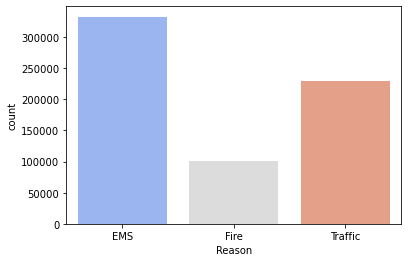

In [23]:
sns.countplot(x='Reason', data=df,palette='coolwarm')

### Day where the most of the 911 calls were placed and what was the reason for that call

In [25]:
type(df['timeStamp'].iloc[0])

str

In [27]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

In [59]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:10:52')

In [36]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,3,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,3,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,3,12


In [38]:
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [40]:
df['Day of week'] = df['Day of week'].map(dmap)

In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thursday,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thursday,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thursday,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thursday,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,Thursday,12


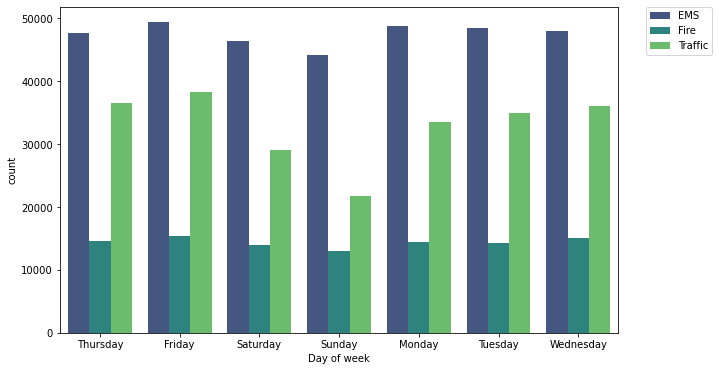

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of week', data=df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

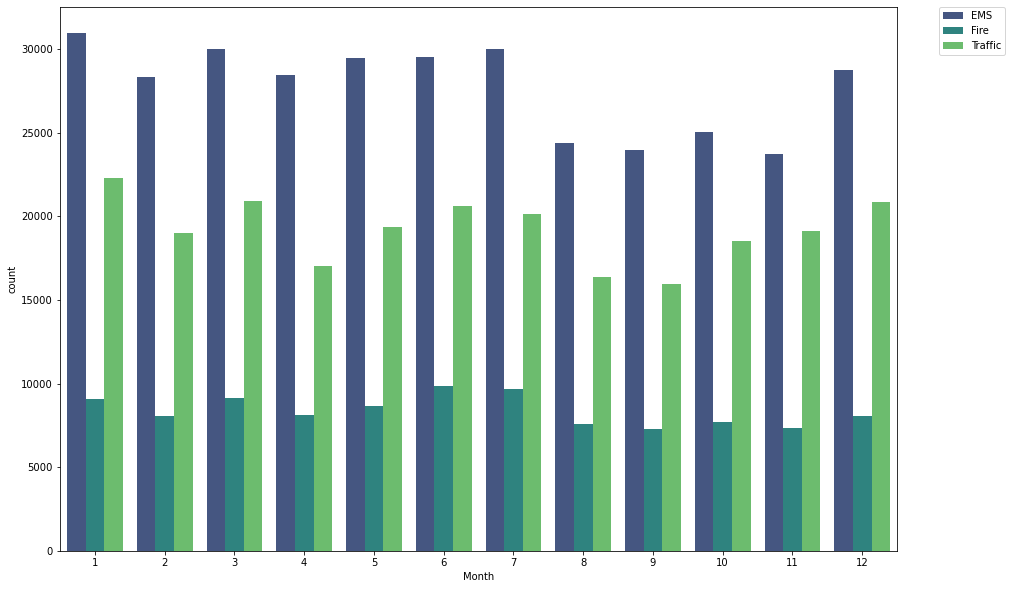

In [53]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Month', data=df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

### Spikes in months, years and day of the week for different reasons for the call

In [55]:
t = df['timeStamp'].iloc[0]

In [56]:
t

Timestamp('2015-12-10 17:10:52')

In [62]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [64]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thursday,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thursday,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,Thursday,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,Thursday,12,2015-12-10


In [72]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of week,Month
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


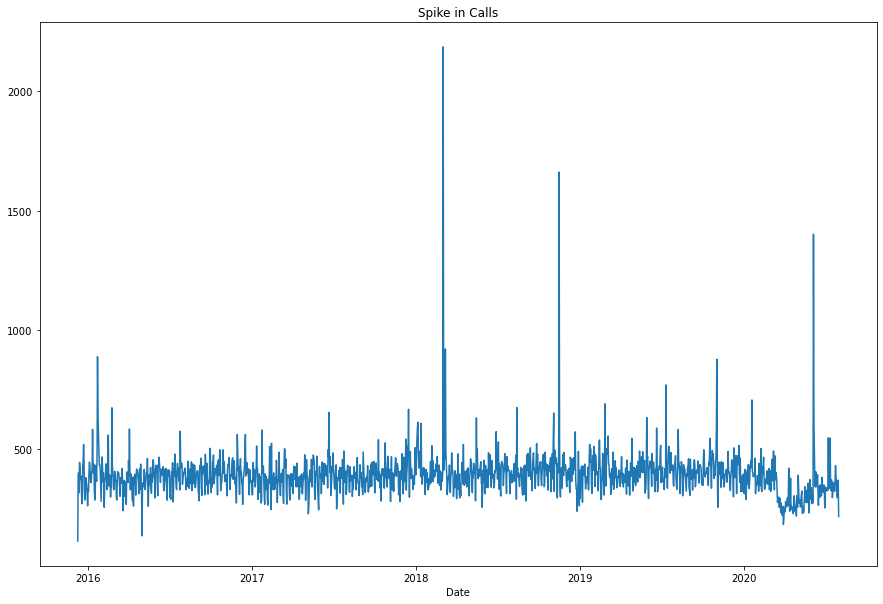

In [76]:
plt.figure(figsize=(15, 10))
df.groupby('Date').count()['lat'].plot()
plt.title('Spike in Calls')
plt.show()

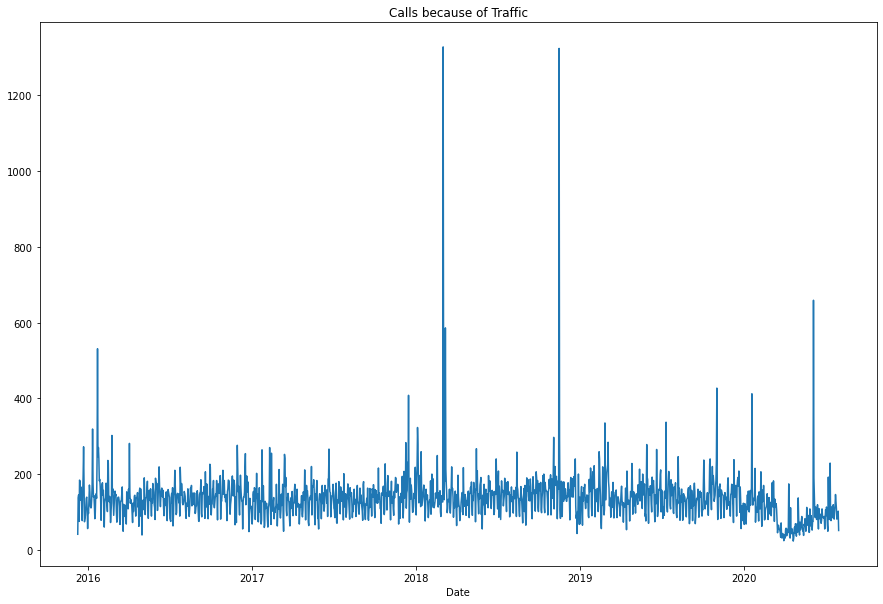

In [78]:
plt.figure(figsize=(15, 10))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Calls because of Traffic')
plt.show()

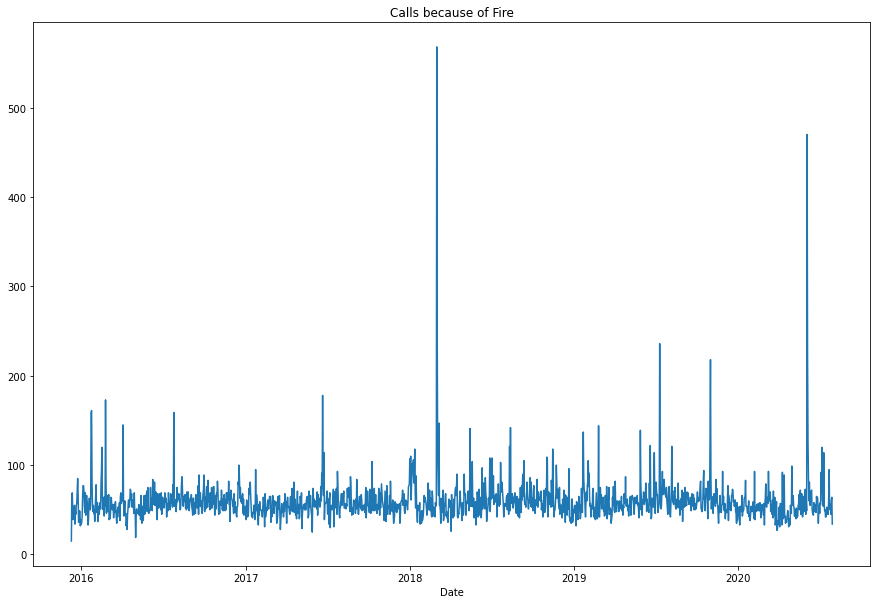

In [79]:
plt.figure(figsize=(15, 10))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Calls because of Fire')
plt.show()

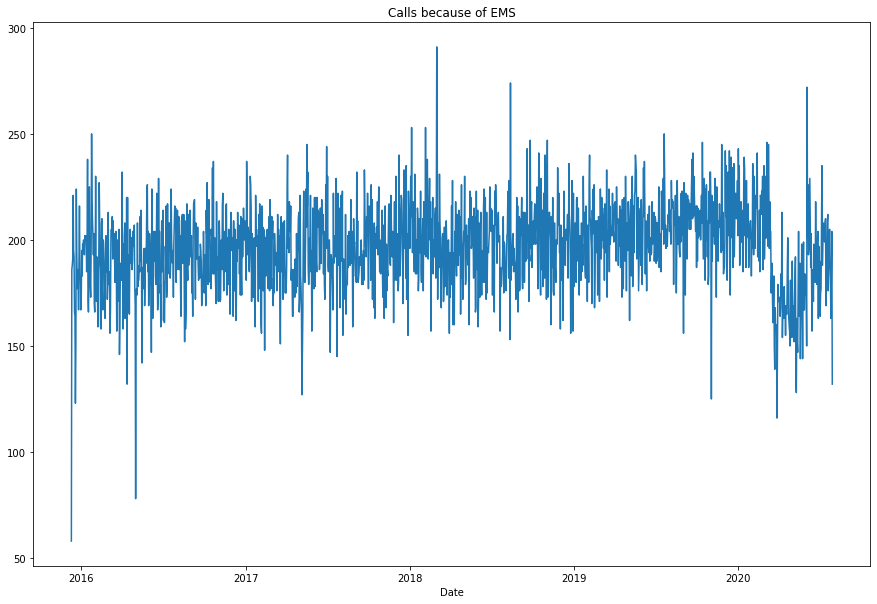

In [80]:
plt.figure(figsize=(15, 10))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('Calls because of EMS')
plt.show()

### Prime days, hours and months when the crime happened

In [84]:
dayHour = df.groupby(by=['Day of week','Hour']).count()['Reason'].unstack()

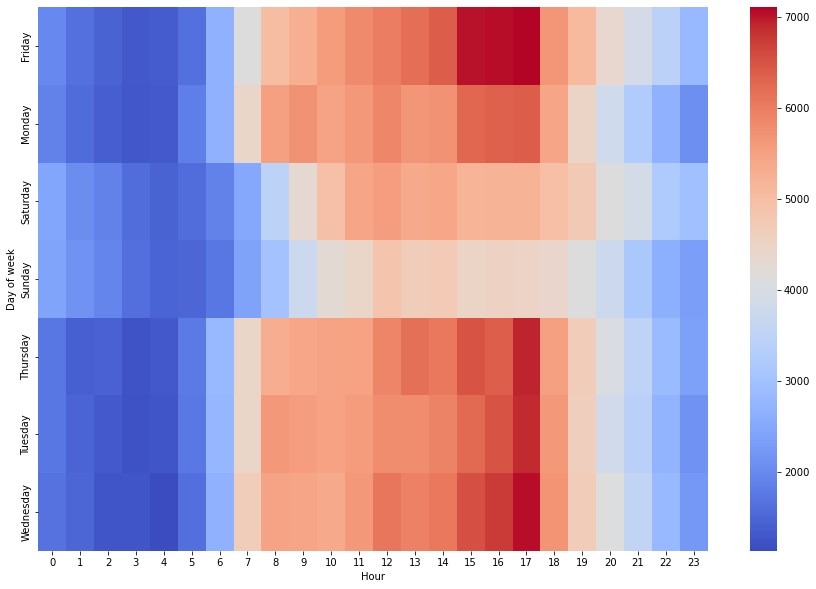

In [94]:
plt.figure(figsize=(15, 10))
sns.heatmap(dayHour,cmap='coolwarm')
plt.show()

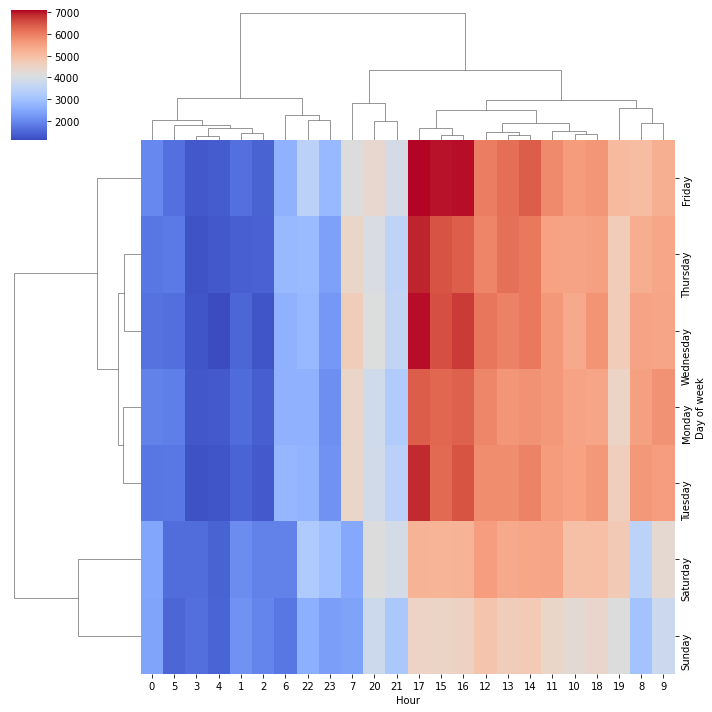

In [93]:
sns.clustermap(dayHour,cmap='coolwarm')

In [91]:
dayMonth = df.groupby(by=['Day of week','Month']).count()['Reason'].unstack()

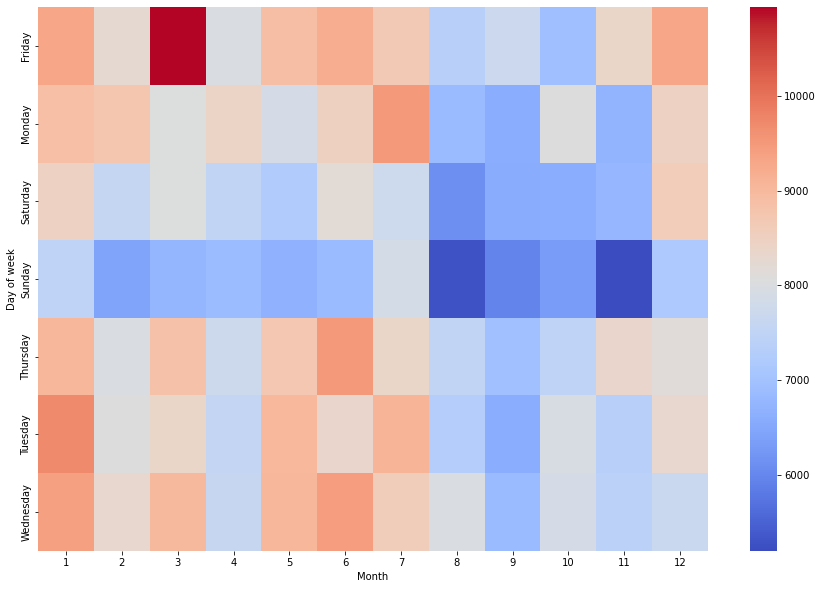

In [95]:
plt.figure(figsize=(15, 10))
sns.heatmap(dayMonth,cmap='coolwarm')
plt.show()

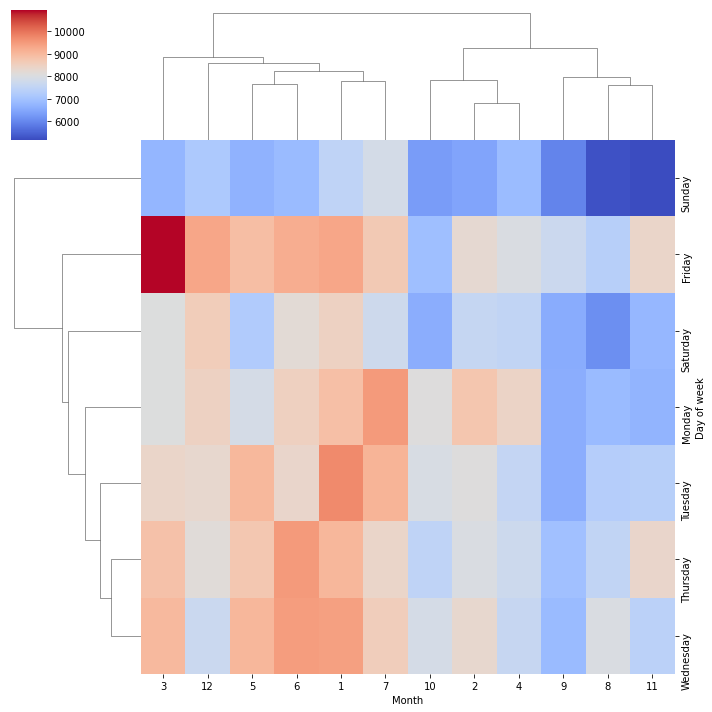

In [96]:
sns.clustermap(dayMonth,cmap='coolwarm')

### My Insights:

- EMS for the reason for the maximum amount of calls placed

- Friday, Monday and Tuesday are the days where people placed an emergency calls because of 'EMS' followed by 'Traffic' and then 'Fire'

- We can say that the year 2018 was the year in which a lot of emergencies took place

- Friday and Wednesday between 15hour to 17hour lots of emergency calls took place


- The month of March and Fridays is the prime time for all the calls for emergencies